In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt


In [3]:
train_path= "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [4]:
test_path= "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(train_path, sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")

In [5]:
train_data.head()

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
test_data.head()

,ID,TITLE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
# Rename the columns
test_data = test_data.rename(columns={"ID": "TITLE", "TITLE": "GENRE"})

In [8]:
test_data.head()

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [9]:
train_data['DESCRIPTION'][37]

" Jos wakes up in a homeless shelter in Groningen (North of the Netherlands). It's a place to stay for the night. At 10am the street life starts over again. Come rain or shine. It doesn't matter if you're ill or don't feel like leaving. At 10pm people are welcome again. For Jos, this is a day like many other, or isn't it? No, today is different. Jos has a plan. He wants to make amends. Can he convince his ex girlfriend? And his friends? That it's all going to be different now? Jos wants to change. No more drinking. No coke, heroin or other junk. Never again. It's now or never. Well, maybe this week? Jos really wants to change. Starting today, well......at least tomorrow."

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 3.7+ MB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


# CLEANING DESCRIPTION
1. Remove links
2. Remove Mentions
3. Replace non alphabetic characters with spaces 
4. Convert text to lower


In [12]:
import re
import string

def clean_des(text):
    def clean_html(text):  # removes HTML links
        clean = re.compile('<.*?>')
        return re.sub(clean, '', text)
    
    text = clean_html(text)  # Remove HTML links
    text = re.sub(r'@\S+', '', text)  # Removes any mentions (e.g., @username) from the text
    text = re.sub(r'http\S+', '', text)  # Removes URLs starting with http
    text = re.sub(r'.pic\S+', '', text)  # Removes any strings starting with .pic.
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Replaces non-alphabetic characters with space
    text = "".join([i for i in text if i not in string.punctuation])  # Removes punctuation
    text = text.lower()  # Convert text to lowercase to ensure uniformity
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space and strip leading/trailing spaces
    return text

In [13]:
train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(clean_des)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(clean_des)

In [14]:
train_data["TextCleaning"][37]

'jos wakes up in a homeless shelter in groningen north of the netherlands it s a place to stay for the night at am the street life starts over again come rain or shine it doesn t matter if you re ill or don t feel like leaving at pm people are welcome again for jos this is a day like many other or isn t it no today is different jos has a plan he wants to make amends can he convince his ex girlfriend and his friends that it s all going to be different now jos wants to change no more drinking no coke heroin or other junk never again it s now or never well maybe this week jos really wants to change starting today well at least tomorrow'

**USING SNOWBALL STEMMER**

In [15]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords


# Initialize the stemmer and stop words
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))
def stem_snowball(text):
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Stem the words and remove stop words
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]
    
    # Join the words back into a single string
    text = " ".join(words)
    return text
    


In [16]:
train_data["TextCleaning"] = train_data["TextCleaning"].apply(stem_snowball)
test_data["TextCleaning"] = test_data["TextCleaning"].apply(stem_snowball)

In [17]:
train_data["TextCleaning"][37]

'jos wake homeless shelter groningen north netherland place stay night street life start come rain shine matter ill feel like leav peopl welcom jos day like mani today differ jos plan want make amend convinc girlfriend friend go differ jos want chang drink coke heroin junk never never well mayb week jos realli want chang start today well least tomorrow'

In [18]:
train_data.head()

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent year old oscar le...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empti student field trip museum natur hist...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer recov bodi ground zero also st...


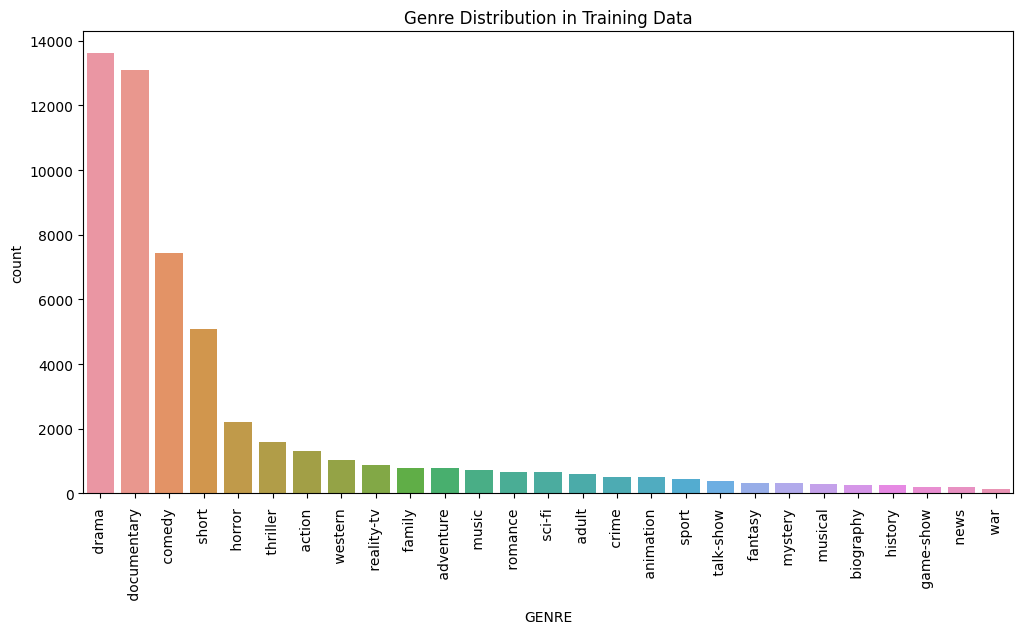

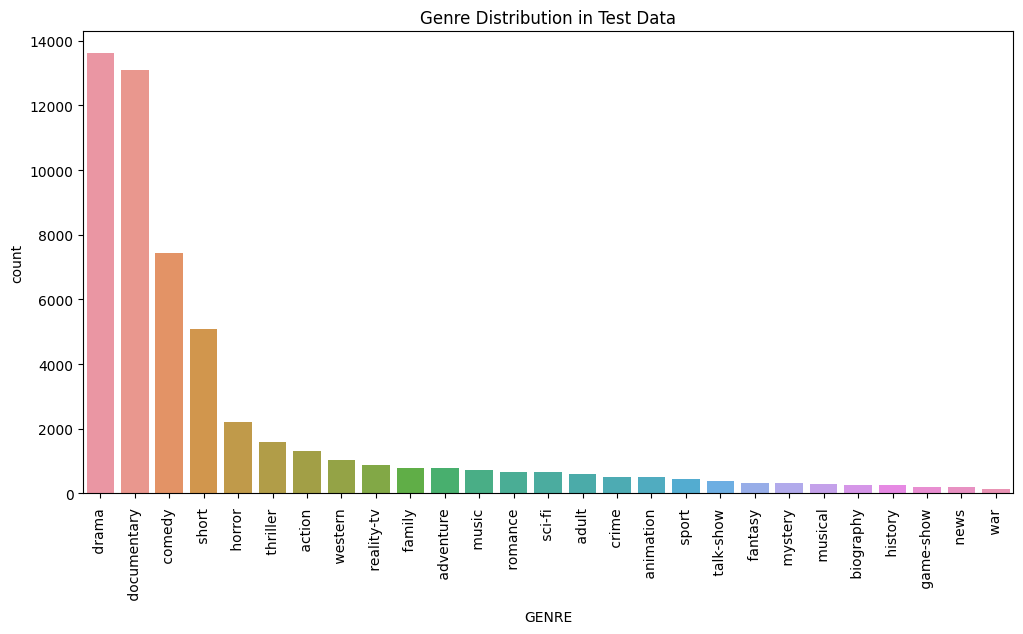

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution for training data
plt.figure(figsize=(12, 6))
sns.countplot(x='GENRE', data=train_data, order=train_data['GENRE'].value_counts().index)
plt.title('Genre Distribution in Training Data')
plt.xticks(rotation=90)
plt.show()

# Plot distribution for test data
plt.figure(figsize=(12, 6))
sns.countplot(x='GENRE', data=test_data, order=test_data['GENRE'].value_counts().index)
plt.title('Genre Distribution in Test Data')
plt.xticks(rotation=90)
plt.show()


In [20]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_data and test_data are your dataframes with 'DESCRIPTION' and 'GENRE' columns

# Function to resample data
def resample_data(data, target_column):
    # Separate majority and minority classes
    genre_counts = data[target_column].value_counts()
    max_samples = genre_counts.max()

    # Resample each genre to have max_samples
    resampled_data = []
    for genre in genre_counts.index:
        genre_data = data[data[target_column] == genre]
        resampled_genre_data = resample(genre_data, replace=True, n_samples=max_samples, random_state=42)
        resampled_data.append(resampled_genre_data)

    # Combine resampled data
    resampled_data = pd.concat(resampled_data)

    # Shuffle the data
    resampled_data = resampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

    return resampled_data

# Resample training and test data
resampled_train_data = resample_data(train_data, 'GENRE')
resampled_test_data = resample_data(test_data, 'GENRE')

# Check the distribution
print("Training Data Genre Distribution After Resampling:")
print(resampled_train_data['GENRE'].value_counts())

print("Test Data Genre Distribution After Resampling:")
print(resampled_test_data['GENRE'].value_counts())


Training Data Genre Distribution After Resampling:
GENRE
crime           13613
comedy          13613
family          13613
adventure       13613
sci-fi          13613
romance         13613
news            13613
history         13613
biography       13613
western         13613
action          13613
documentary     13613
talk-show       13613
animation       13613
thriller        13613
music           13613
drama           13613
sport           13613
fantasy         13613
reality-tv      13613
war             13613
game-show       13613
musical         13613
adult           13613
mystery         13613
horror          13613
short           13613
Name: count, dtype: int64
Test Data Genre Distribution After Resampling:
GENRE
crime           13613
comedy          13613
family          13613
adventure       13613
sci-fi          13613
romance         13613
news            13613
history         13613
biography       13613
western         13613
action          13613
documentary     13613
talk-s

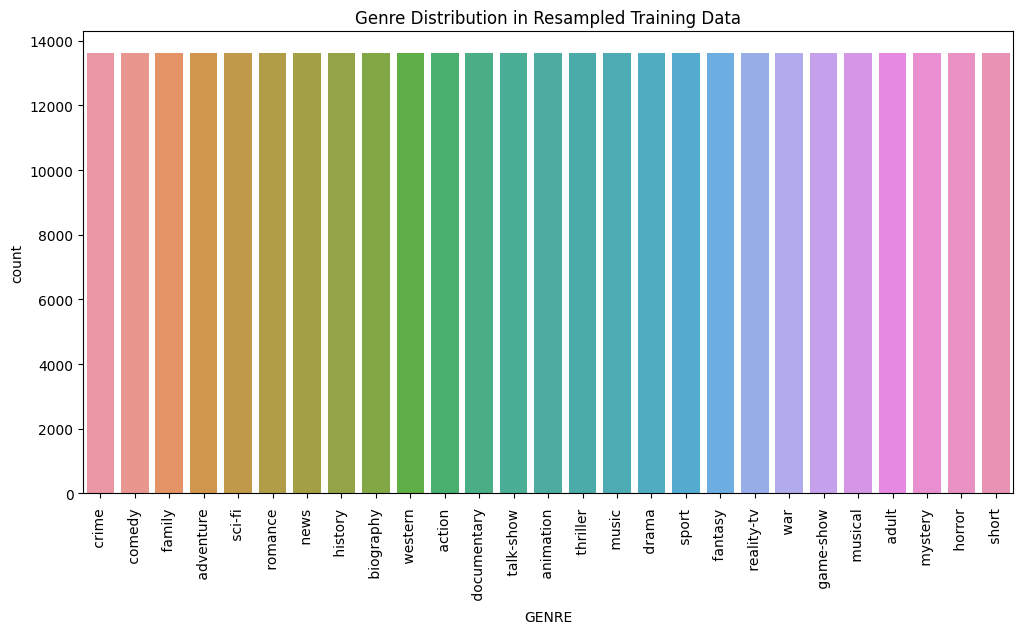

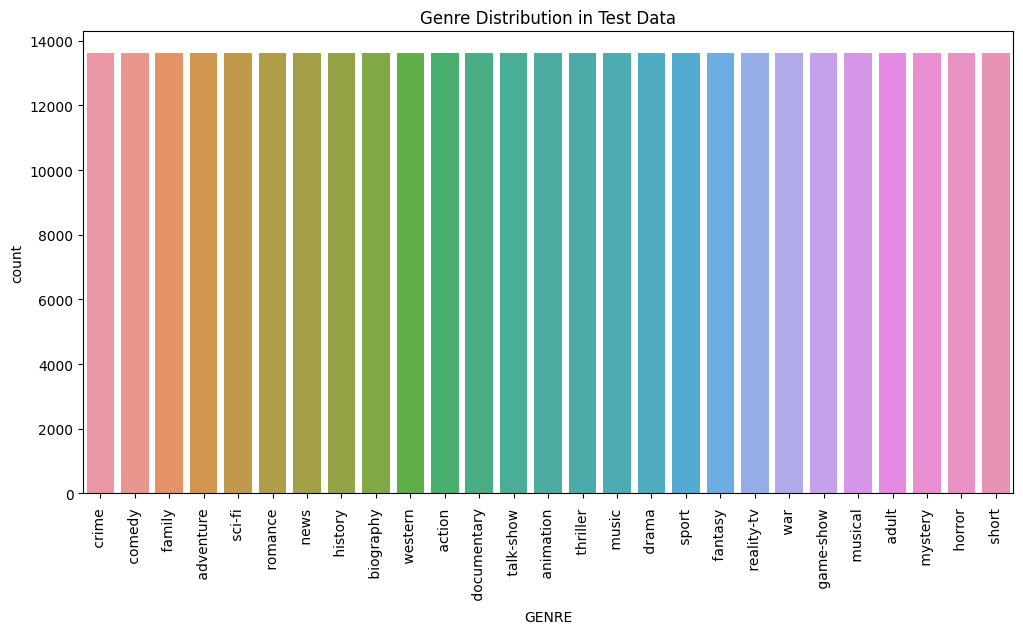

In [21]:
# Plot distribution for resampled training data
plt.figure(figsize=(12, 6))
sns.countplot(x='GENRE', data=resampled_train_data, order=resampled_train_data['GENRE'].value_counts().index)
plt.title('Genre Distribution in Resampled Training Data')
plt.xticks(rotation=90)
plt.show()

# Plot distribution for test data
plt.figure(figsize=(12, 6))
sns.countplot(x='GENRE', data=resampled_test_data, order=resampled_test_data['GENRE'].value_counts().index)
plt.title('Genre Distribution in Test Data')
plt.xticks(rotation=90)
plt.show()


# LABEL ENCODING

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'GENRE' column
resampled_train_data['GENRE'] = label_encoder.fit_transform(resampled_train_data['GENRE'])
resampled_test_data['GENRE'] = label_encoder.fit_transform(resampled_test_data['GENRE'])



In [23]:
# Display the first few rows of the dataset to verify
print(resampled_train_data.head())

                                               TITLE  GENRE  \
0                Only If It Doesn't Kill You (2012)       6   
1                              You Tell Me (2006/I)       5   
2   Lots & Lots of Big Trains: Giant Railroads in...      9   
3                   Beneath the 12-Mile Reef (1953)       2   
4   Tim Cohen's Amazing Adventures in Cardboard B...     20   

                                         DESCRIPTION  \
0   Joana Holmes is a homicide detective in the E...   
1   Ever think that your best friend's girlfriend...   
2   Train lovers of all ages will thrill to 17 of...   
3   Mike and Tony Petrakis are a Greek father and...   
4   When Tim Cohen travels back in time, he feels...   

                                        TextCleaning  
0  joana holm homicid detect eastern suburb sydne...  
1  ever think best friend girlfriend attract peop...  
2  train lover age thrill color spectacular big t...  
3  mike toni petraki greek father son team dive s...  
4  tim co

In [24]:
print(resampled_test_data.head())

                                               TITLE  GENRE  \
0                Only If It Doesn't Kill You (2012)       6   
1                              You Tell Me (2006/I)       5   
2   Lots & Lots of Big Trains: Giant Railroads in...      9   
3                   Beneath the 12-Mile Reef (1953)       2   
4   Tim Cohen's Amazing Adventures in Cardboard B...     20   

                                         DESCRIPTION  \
0   Joana Holmes is a homicide detective in the E...   
1   Ever think that your best friend's girlfriend...   
2   Train lovers of all ages will thrill to 17 of...   
3   Mike and Tony Petrakis are a Greek father and...   
4   When Tim Cohen travels back in time, he feels...   

                                        TextCleaning  
0  joana holm homicid detect eastern suburb sydne...  
1  ever think best friend girlfriend attract peop...  
2  train lover age thrill color spectacular big t...  
3  mike toni petraki greek father son team dive s...  
4  tim co

# SPLITTING DATA


In [25]:
from sklearn.model_selection import train_test_split
# Split the data into train+validation and test sets (80% train+validation, 20% test)
train_data,test_data = train_test_split(resampled_train_data, test_size=0.2, random_state=42, stratify=resampled_train_data['GENRE'])

# Split the train+validation data into train and validation sets (75% train, 25% validation of the 80% train+validation set)
train_data, val_data = train_test_split(resampled_train_data, test_size=0.25, random_state=42, stratify=resampled_train_data['GENRE'])


# VECTORIZER

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Extract features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()  # Adjust max_features as needed

# Fit the vectorizer on the training data and transform training, validation, and test data
X_train = tfidf_vectorizer.fit_transform(train_data['DESCRIPTION'])
X_val = tfidf_vectorizer.transform(val_data['DESCRIPTION'])
X_test = tfidf_vectorizer.transform(test_data['DESCRIPTION'])


In [27]:
# Extract the labels
y_train = train_data['GENRE']
y_val = val_data['GENRE']
y_test = test_data['GENRE']


# **MODEL CREATION**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=100)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = model.predict(X_val)

# Evaluate the model
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.9427019850252482

Classification Report:
               precision    recall  f1-score   support

      action        0.93      0.95      0.94      3403
       adult        0.98      1.00      0.99      3403
   adventure        0.97      0.99      0.98      3403
   animation        0.98      1.00      0.99      3403
   biography        0.99      1.00      0.99      3403
      comedy        0.82      0.71      0.76      3403
       crime        0.97      1.00      0.98      3404
 documentary        0.82      0.74      0.78      3404
       drama        0.74      0.59      0.66      3403
      family        0.95      0.98      0.96      3403
     fantasy        0.99      1.00      0.99      3404
   game-show        1.00      1.00      1.00      3403
     history        0.99      1.00      0.99      3403
      horror        0.93      0.92      0.93      3403
       music        0.96      0.99      0.98      3404
     musical        0.99      1.00      1.00      3403
